<a href="https://colab.research.google.com/github/Neel7317/Reinforcement_Learning-/blob/main/Q_Learning_eg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [4]:
env = gym.make("FrozenLake-v1")

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [5]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n


In [6]:
q_table = np.zeros((state_space_size, action_space_size))

In [7]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [22]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

In [24]:
rewards_all_episodes = []

In [25]:
for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

      # Exploration-exploitation trade-off
      exploration_rate_threshold = random.uniform(0, 1)
      if exploration_rate_threshold > exploration_rate:
          action = np.argmax(q_table[state,:]) 
      else:
          action = env.action_space.sample()
      
      new_state, reward, done, info = env.step(action)

      # Update Q-table for Q(s,a)
      q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

      state = new_state
      rewards_current_episode += reward 

      if done == True: 
        break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)

In [26]:
q_table

array([[0.53538105, 0.52434216, 0.52647105, 0.52222817],
       [0.30372084, 0.3327069 , 0.30420586, 0.49670111],
       [0.42563227, 0.42680907, 0.4061982 , 0.46588369],
       [0.36060034, 0.33526216, 0.24312093, 0.45160661],
       [0.55506005, 0.37361852, 0.5208317 , 0.43574693],
       [0.        , 0.        , 0.        , 0.        ],
       [0.15279436, 0.10605279, 0.24882125, 0.12835455],
       [0.        , 0.        , 0.        , 0.        ],
       [0.32597575, 0.29149704, 0.43914857, 0.60482342],
       [0.4135644 , 0.63014318, 0.38741037, 0.43839989],
       [0.52099163, 0.48676114, 0.43668002, 0.24267463],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.42482823, 0.38877811, 0.75728875, 0.47200255],
       [0.73626761, 0.89385879, 0.76663685, 0.74455932],
       [0.        , 0.        , 0.        , 0.        ]])

In [27]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.5280000000000004
2000 :  0.6840000000000005
3000 :  0.6850000000000005
4000 :  0.7130000000000005
5000 :  0.6840000000000005
6000 :  0.6600000000000005
7000 :  0.7240000000000005
8000 :  0.6830000000000005
9000 :  0.6800000000000005
10000 :  0.6900000000000005


In [13]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [14]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [15]:
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [16]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(100, 100))
display.start()

In [105]:
!pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


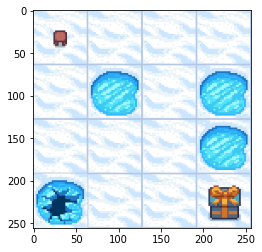

In [30]:
no_of_episode=3
for i in range(no_of_episode):
  state=env.reset()
  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  #time.sleep(0.2)
  for i in range(25):
    action=np.argmax(q_table[state,:]) 
    obs, reward, done, info = env.step(action)
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    #time.sleep(0.2)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done:
      break

  ipythondisplay.clear_output(wait=True)
  env.close()